# Análise de quantidade de Transplantes desde de 2018

In [1]:
## Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Importando Dados

* Leitura de número de internações gerados do TabNet:
* Separados por SubGrupo de Procedimentos
* Gerados mês a mês por data de processamento
* Removendo o Total

In [2]:
dados_internacoes = pd.read_csv("https://raw.githubusercontent.com/ataide-junior/bds_alura_desafio_modulo1/main/dados/A131354189_28_143_208.csv", encoding="ISO-8859-1", 
                                skiprows=3, skipfooter=12, sep=";", thousands=".", decimal=",").drop("Total", axis=1)
dados_internacoes.head()

/home/ataide/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Subgrupo proced.,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set
0,0201 Coleta de material,-,-,-,-,-,-,-,-,-,...,720,715,713,779,773,899,869,798,769,349
1,0209 Diagnóstico por endoscopia,-,-,-,-,-,-,-,-,-,...,515,482,550,524,553,708,703,682,622,334
2,0211 Métodos diagnósticos em especialidades,-,-,-,-,-,-,-,-,-,...,358,355,391,336,303,369,388,355,378,214
3,0301 Consultas / Atendimentos / Acompanhamentos,-,-,-,-,-,-,-,-,-,...,29026,29392,27559,28457,27194,30300,29477,27151,24460,16064
4,0303 Tratamentos clínicos (outras especialidades),68168,523,375,305,324,514,321,520,468,...,371331,399789,385784,498687,467772,487247,441574,373332,297262,155385


## Mudança de índice

* Mudar o índice do dataframe para o nome do SubGrupo e não um sequencia iniciado em zero

In [3]:
dados_internacoes = dados_internacoes.set_index("Subgrupo proced.")
dados_internacoes.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set
Subgrupo proced.,,,,,,,,,,,,,,,,,,,,,
0201 Coleta de material,-,-,-,-,-,-,-,-,-,-,...,720,715,713,779,773,899,869,798,769,349
0209 Diagnóstico por endoscopia,-,-,-,-,-,-,-,-,-,-,...,515,482,550,524,553,708,703,682,622,334
0211 Métodos diagnósticos em especialidades,-,-,-,-,-,-,-,-,-,-,...,358,355,391,336,303,369,388,355,378,214
0301 Consultas / Atendimentos / Acompanhamentos,-,-,-,-,-,-,-,-,-,-,...,29026,29392,27559,28457,27194,30300,29477,27151,24460,16064
0303 Tratamentos clínicos (outras especialidades),68168,523,375,305,324,514,321,520,468,615,...,371331,399789,385784,498687,467772,487247,441574,373332,297262,155385


## Separando dados a partir de janeiro de 2018

In [4]:
colunas_interessadas = dados_internacoes.columns[120:]
dados_internacoes = dados_internacoes[colunas_interessadas]
dados_internacoes.head()

,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,...,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set
Subgrupo proced.,,,,,,,,,,,,,,,,,,,,,
0201 Coleta de material,932,812,1018,958,1024,927,980,1043,942,1074,...,720,715,713,779,773,899,869,798,769,349
0209 Diagnóstico por endoscopia,610,527,542,646,660,587,723,630,542,642,...,515,482,550,524,553,708,703,682,622,334
0211 Métodos diagnósticos em especialidades,581,572,674,706,665,628,697,749,677,725,...,358,355,391,336,303,369,388,355,378,214
0301 Consultas / Atendimentos / Acompanhamentos,31897,28928,32950,31548,31741,30613,31273,31981,30968,32784,...,29026,29392,27559,28457,27194,30300,29477,27151,24460,16064
0303 Tratamentos clínicos (outras especialidades),388315,348685,404883,410757,419858,401191,403933,403021,379717,398090,...,371331,399789,385784,498687,467772,487247,441574,373332,297262,155385


## Verificando os tipo de dados

In [5]:
dados_internacoes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0201 Coleta de material to 0506 Acompanhamento e intercorrências no pré e pós-transplante
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   2018/Jan  30 non-null     int64
 1   2018/Fev  30 non-null     int64
 2   2018/Mar  30 non-null     int64
 3   2018/Abr  30 non-null     int64
 4   2018/Mai  30 non-null     int64
 5   2018/Jun  30 non-null     int64
 6   2018/Jul  30 non-null     int64
 7   2018/Ago  30 non-null     int64
 8   2018/Set  30 non-null     int64
 9   2018/Out  30 non-null     int64
 10  2018/Nov  30 non-null     int64
 11  2018/Dez  30 non-null     int64
 12  2019/Jan  30 non-null     int64
 13  2019/Fev  30 non-null     int64
 14  2019/Mar  30 non-null     int64
 15  2019/Abr  30 non-null     int64
 16  2019/Mai  30 non-null     int64
 17  2019/Jun  30 non-null     int64
 18  2019/Jul  30 non-null     int64
 19  2019/Ago  30 non-null     int64
 20  2

## Gráfico dos dados do período de todos os Subgrupos

<function matplotlib.pyplot.show(close=None, block=None)>

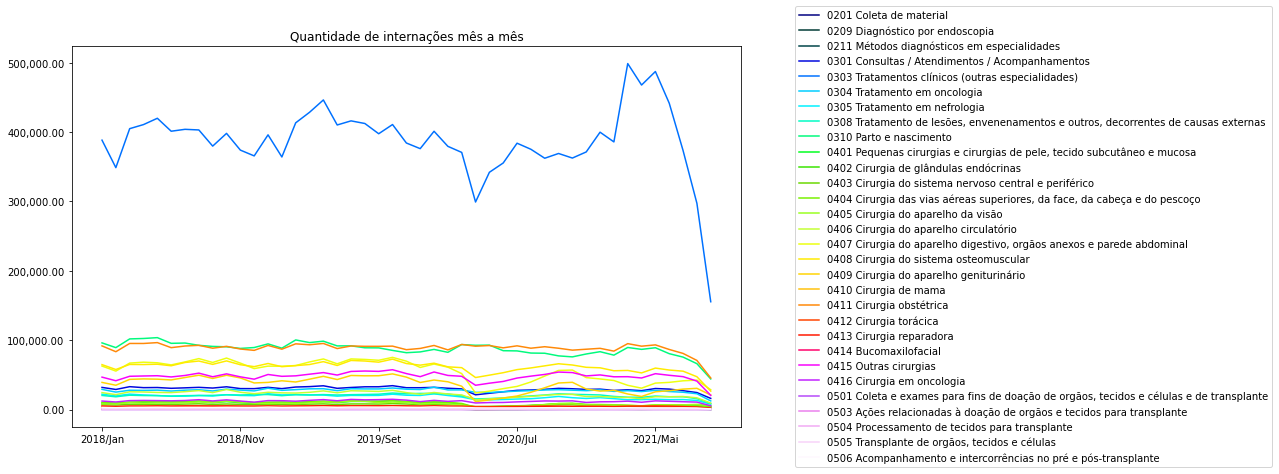

In [6]:
ax = dados_internacoes.T.plot(figsize=(12,7), colormap="gist_ncar")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Quantidade de internações mês a mês")
plt.legend(loc='right', bbox_to_anchor=(1.8, 0.5))
plt.show

## Criando grupos de procedimentos com base no código do subgrupo

In [7]:
dados_internacoes.insert(loc=0, column="Grupo", 
                         value = dados_internacoes.index.str.slice(start=0, stop=2))
dados_internacoes.head()

,Grupo,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,...,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set
Subgrupo proced.,,,,,,,,,,,,,,,,,,,,,
0201 Coleta de material,02,932,812,1018,958,1024,927,980,1043,942,...,720,715,713,779,773,899,869,798,769,349
0209 Diagnóstico por endoscopia,02,610,527,542,646,660,587,723,630,542,...,515,482,550,524,553,708,703,682,622,334
0211 Métodos diagnósticos em especialidades,02,581,572,674,706,665,628,697,749,677,...,358,355,391,336,303,369,388,355,378,214
0301 Consultas / Atendimentos / Acompanhamentos,03,31897,28928,32950,31548,31741,30613,31273,31981,30968,...,29026,29392,27559,28457,27194,30300,29477,27151,24460,16064
0303 Tratamentos clínicos (outras especialidades),03,388315,348685,404883,410757,419858,401191,403933,403021,379717,...,371331,399789,385784,498687,467772,487247,441574,373332,297262,155385


* Informando a descrição do grupo de procedimentos

In [9]:
dados_internacoes.loc[dados_internacoes["Grupo"] == "02", "Grupo"] = "02 Procedimentos com finalidade diagnóstica"
dados_internacoes.loc[dados_internacoes["Grupo"] == "03", "Grupo"] = "03 Procedimentos clínicos"
dados_internacoes.loc[dados_internacoes["Grupo"] == "04", "Grupo"] = "04 Procedimentos cirúrgicos"
dados_internacoes.loc[dados_internacoes["Grupo"] == "05", "Grupo"] = "05 Transplantes de orgãos, tecidos e células"
dados_internacoes.head()

,Grupo,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,...,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set
Subgrupo proced.,,,,,,,,,,,,,,,,,,,,,
0201 Coleta de material,02 Procedimentos com finalidade diagnóstica,932,812,1018,958,1024,927,980,1043,942,...,720,715,713,779,773,899,869,798,769,349
0209 Diagnóstico por endoscopia,02 Procedimentos com finalidade diagnóstica,610,527,542,646,660,587,723,630,542,...,515,482,550,524,553,708,703,682,622,334
0211 Métodos diagnósticos em especialidades,02 Procedimentos com finalidade diagnóstica,581,572,674,706,665,628,697,749,677,...,358,355,391,336,303,369,388,355,378,214
0301 Consultas / Atendimentos / Acompanhamentos,03 Procedimentos clínicos,31897,28928,32950,31548,31741,30613,31273,31981,30968,...,29026,29392,27559,28457,27194,30300,29477,27151,24460,16064
0303 Tratamentos clínicos (outras especialidades),03 Procedimentos clínicos,388315,348685,404883,410757,419858,401191,403933,403021,379717,...,371331,399789,385784,498687,467772,487247,441574,373332,297262,155385


## Análise dos dados de transplantes

* Filtrando pelo grupo: 05 Transplantes de orgãos, tecidos e células
* Removendo coluna de grupo de procedimentos

In [10]:
dados_transplantes = dados_internacoes.query('Grupo == "05 Transplantes de orgãos, tecidos e células"')
colunas_interessadas = dados_transplantes.columns[1:]
dados_transplantes = dados_transplantes[colunas_interessadas]
dados_transplantes

,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,...,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set
Subgrupo proced.,,,,,,,,,,,,,,,,,,,,,
"0501 Coleta e exames para fins de doação de orgãos, tecidos e células e de transplante",66,63,59,59,66,72,60,76,75,70,...,59,65,46,61,54,59,53,58,60,28
0503 Ações relacionadas à doação de orgãos e tecidos para transplante,1704,1722,1867,1886,2088,1829,1919,2025,1884,1969,...,1427,1432,1403,1326,1444,1530,1571,1601,1437,791
0504 Processamento de tecidos para transplante,122,137,135,161,166,127,116,176,160,160,...,68,96,75,65,83,124,154,132,109,29
"0505 Transplante de orgãos, tecidos e células",1163,1078,1156,1169,1337,1141,1215,1279,1123,1265,...,840,962,878,853,782,898,924,985,923,410
0506 Acompanhamento e intercorrências no pré e pós-transplante,3126,2656,3180,3224,3350,3103,3132,3152,3043,3220,...,2631,2628,2423,2605,2408,2390,2342,2403,2170,916


<function matplotlib.pyplot.show(close=None, block=None)>

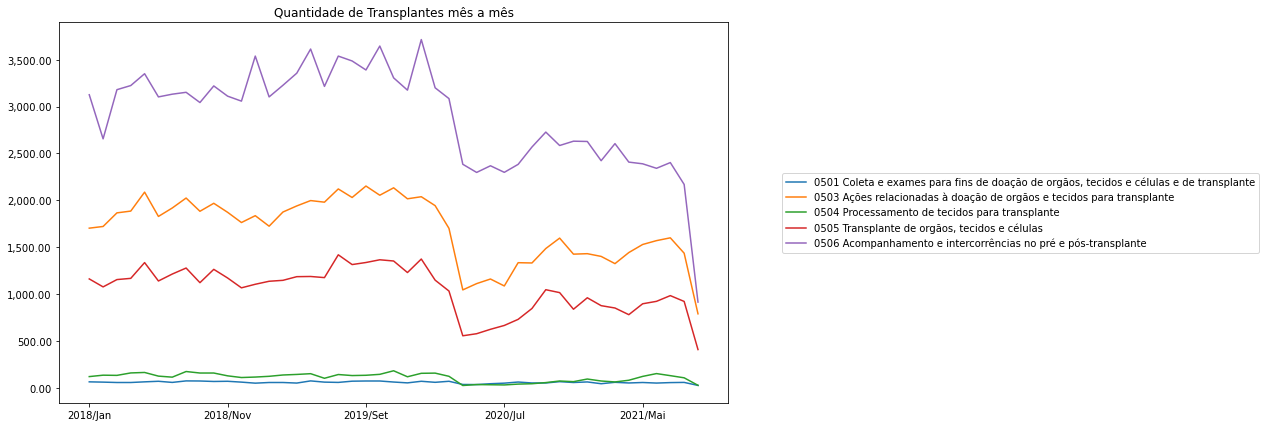

In [11]:
ax = dados_transplantes.T.plot(figsize=(12,7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Quantidade de Transplantes mês a mês")
plt.legend(loc='right', bbox_to_anchor=(1.8, 0.5))
plt.show

*Apresentado no gráfico uma queda nos primeros meses de 2020, quando os cados de Covid19 tiveram crescimento no Brasil*

* Criando um séria com totais de transplantes mês a mês

In [12]:
dados_total_transplantes = dados_transplantes.sum()
dados_total_transplantes

2018/Jan    6181
2018/Fev    5656
2018/Mar    6397
2018/Abr    6499
2018/Mai    7007
2018/Jun    6272
2018/Jul    6442
2018/Ago    6708
2018/Set    6285
2018/Out    6684
2018/Nov    6359
2018/Dez    6065
2019/Jan    6650
2019/Fev    6150
2019/Mar    6449
2019/Abr    6682
2019/Mai    7029
2019/Jun    6540
2019/Jul    7284
2019/Ago    7039
2019/Set    7092
2019/Out    7288
2019/Nov    7042
2019/Dez    6598
2020/Jan    7357
2020/Fev    6514
2020/Mar    6018
2020/Abr    4053
2020/Mai    4064
2020/Jun    4238
2020/Jul    4139
2020/Ago    4558
2020/Set    4850
2020/Out    5375
2020/Nov    5343
2020/Dez    5025
2021/Jan    5183
2021/Fev    4825
2021/Mar    4910
2021/Abr    4771
2021/Mai    5001
2021/Jun    5044
2021/Jul    5179
2021/Ago    4699
2021/Set    2174
dtype: int64

In [13]:
dados_total_transplantes.describe()

count      45.000000
mean     5815.955556
std      1128.520048
min      2174.000000
25%      5001.000000
50%      6181.000000
75%      6650.000000
max      7357.000000
dtype: float64

* Localizando mês com mais quantidade de internações

In [14]:
dados_total_transplantes.idxmax()

'2020/Jan'

* Quantidade de internações em função de Janeiro/2020

<function matplotlib.pyplot.show(close=None, block=None)>

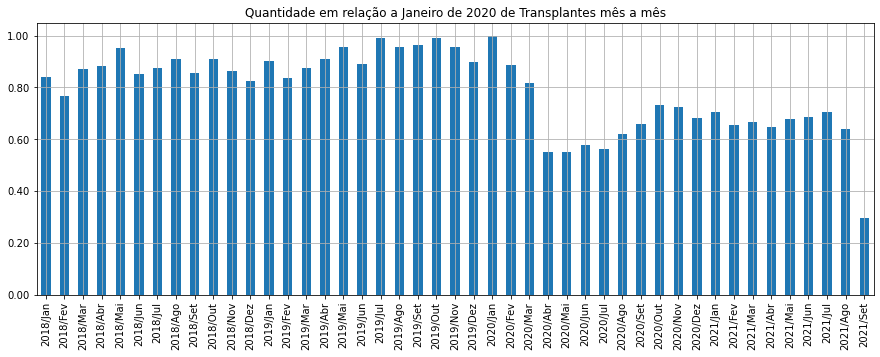

In [15]:
dados_funcao_janeiro_2020 = dados_total_transplantes / dados_total_transplantes.loc["2020/Jan"]
ax = dados_funcao_janeiro_2020.plot(kind='bar', figsize=(15,5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Quantidade em relação a Janeiro de 2020 de Transplantes mês a mês")
plt.grid(True)
plt.show

## Conclusão

* Análise realizada para verificar com os dados como foi sentida a necessidade de redução de procedimentos eletivos durante os picos de tratamento da pandemia da Covid19.

* Escolhi os grupos de procedimentos ligados a transplantes, pois em geral são procedimentos que o paciente necessidade estadia em UTI's, que em grande parte foram direcionadas para pacientes com a Covid19

* O mês com mais procedimentos foi Janeiro/2020 com 7357 e no gráfico de comparação de quantidade com relação a este mês, podemos verificar a queda de quantidade para abaixo de 80% da quantidade de internações em Janeiro/2020, chegando em abril, maio e junho e julho de 2020 a queba de quantidade para abaixo de 60%.

* Setembro de 2021 possui uma quantidade muito abaixo, pois os dados são por data do procedimento e computados com base na apresentação dos mesmos as secretárias de saúde, demonstrando que ainda podem existir pacientes internados